### Import Libraries

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in Data from the VROD excel- Run only once for creating the Project csv

In [ ]:
# Path to your Excel file
excel_file_path = '../data/VROD_v11_latest.xlsx'

# Name of the sheet you want to export
sheet_name = 'PROJECTS' 

# Read the specific sheet
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header = None)

df.columns = df.iloc[3] 
# # Remove the first two rows
df = df.iloc[4:]
df.reset_index(drop=True, inplace=True)
# # Export the DataFrame to CSV
csv_file_path = '../data/PROJECTS_V11.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
##Starting from below after the first checkpoint

In [167]:
projects_df = pd.read_csv("../data/PROJECTS_V11.csv", low_memory=False)
methodologies_df = pd.read_csv("../data/projects_table_rules_final_ml.csv", low_memory=False)


In [168]:
projects_df.columns

Index(['Project ID', 'Project Name', 'Voluntary Registry', 'ARB/WA\nProject',
       'Voluntary Status', 'Scope', ' Type', 'Reduction / Removal',
       'Methodology / Protocol', 'Region',
       ...
       '2021.0.3', '2022.0.3', '2023.0.3', '2024.0.3', 'Notes from Registry',
       'Notes from Berkeley Carbon Trading Project',
       'Added to Database Version - With Data Through', 'Unnamed: 158',
       '1st issuance yr (no hard code, hide)', 'Unnamed: 160'],
      dtype='object', length=161)

In [169]:
projects_df.shape

(9089, 161)

In [170]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Columns: 161 entries, Project ID to Unnamed: 160
dtypes: float64(117), int64(10), object(34)
memory usage: 11.2+ MB


In [171]:
## Methodologies dataset
methodologies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   project_id                             9088 non-null   object 
 1   project_name                           9087 non-null   object 
 2   voluntary_registry                     9088 non-null   object 
 3   voluntary_status                       8765 non-null   object 
 4   reduction_removal                      0 non-null      float64
 5   project_type_from_the_registry         9088 non-null   object 
 6   region                                 3923 non-null   object 
 7   country                                9082 non-null   object 
 8   state                                  1641 non-null   object 
 9   project_site_location                  1642 non-null   object 
 10  project_developer                      4951 non-null   object 
 11  arbo

## Explore Data

In [172]:
projects_df.head()

,Project ID,Project Name,Voluntary Registry,ARB/WA\nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Country,State,Project Site Location,Project Developer,Total Credits \nIssued,Total Credits \nRetired,Total Credits Remaining,Total Buffer \nPool Deposits,Reversals Covered by Buffer Pool,Reversals Not Covered by Buffer,First Year of Project (Vintage),1996,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,1996.1,1997.0.1,1998.0.1,1999.0.1,2000.0.1,2001.0.1,2002.0.1,2003.0.1,2004.0.1,2005.0.1,2006.0.1,2007.0.1,2008.0.1,2009.0.1,2010.0.1,2011.0.1,2012.0.1,2013.0.1,2014.0.1,2015.0.1,2016.0.1,2017.0.1,2018.0.1,2019.0.1,2020.0.1,2021.0.1,2022.0.1,2023.0.1,2024.0.1,Year \nUnknown,1996.2,1997.0.2,1998.0.2,1999.0.2,2000.0.2,2001.0.2,2002.0.2,2003.0.2,2004.0.2,2005.0.2,2006.0.2,2007.0.2,2008.0.2,2009.0.2,2010.0.2,2011.0.2,2012.0.2,2013.0.2,2014.0.2,2015.0.2,2016.0.2,2017.0.2,2018.0.2,2019.0.2,2020.0.2,2021.0.2,2022.0.2,2023.0.2,2024.0.2,Project Owner,Offset Project Operator,Authorized Project Designee,Verifier,Estimated Annual Emission Reductions,PERs,Registry / ARB / WA,ARB Project Detail,ARB ID,PoA ID/Aggregate ID,CORSIA Eligible,Project Listed,Project Registered,CCB / Certifications,Project Type From the Registry,Registry \nDocuments,Project Website,1996.3,1997.0.3,1998.0.3,1999.0.3,2000.0.3,2001.0.3,2002.0.3,2003.0.3,2004.0.3,2005.0.3,2006.0.3,2007.0.3,2008.0.3,2009.0.3,2010.0.3,2011.0.3,2012.0.3,2013.0.3,2014.0.3,2015.0.3,2016.0.3,2017.0.3,2018.0.3,2019.0.3,2020.0.3,2021.0.3,2022.0.3,2023.0.3,2024.0.3,Notes from Registry,Notes from Berkeley Carbon Trading Project,Added to Database Version - With Data Through,Unnamed: 158,"1st issuance yr (no hard code, hide)",Unnamed: 160
0,ACR1002,Doyon Ts'oo,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,ALASKA,Southeast and Northwest Interior Alaska,"Doyon, Limited",0,0,0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.doyon.com/about/sustainability/carbon-fore...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,v11 03-2024,NaN,0,1.0
1,ACR1006,Challenge Tree Farm IFM Project,ACR,No,Listed,Forestry & Land Use,Improved Forest Management,Mixed,Improved Forest Management (IFM) on Non-Federa...,North America,United States,CALIFORNIA,Yuba and Butte County,1169,0,0,0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,v11 03-2024,NaN,0,1.0
2,ACR1007,A-Gas 3-2023B,ACR,No,NaN,Chemical Processes,Ozone Depleting Substances Recovery & Destruction,Reduction,ARB Compliance Offset Protocol: Destruction of...,North America,United States,OHIO,Bowling Green,A-Gas US Inc.,0,0,0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Data Cleanup and Preprocessing

In [173]:
# Cleaning up the Feature names to remove newline char, trim spaces, add lowercase and and replace "/" and " " by "or" and "_"
cleaned_column_names = projects_df.columns.str.strip().str.lower().str.replace('\n', '').str.replace('/', 'or').str.replace(' ', '_').str.replace('__', '_')

In [174]:
# Apply the cleaned column names to the DataFrame
projects_df.columns = cleaned_column_names

In [175]:
# Identify columns that match the pattern of years using regex
columns_to_drop = projects_df.columns[projects_df.columns.str.match(r'^\d{4}')]

In [176]:
# Dropping the specified columns
projects_df.drop(columns=columns_to_drop, inplace=True)

In [177]:
null_counts = projects_df.isnull().sum()
null_counts

project_id                                          0
project_name                                        1
voluntary_registry                                  0
arborwaproject                                      0
voluntary_status                                  323
scope                                               0
type                                                0
reduction_or_removal                                0
methodology_or_protocol                           269
region                                              0
country                                             0
state                                            7407
project_site_location                            7445
project_developer                                   1
total_credits_issued                                0
total_credits_retired                               0
total_credits_remaining                             0
total_buffer_pool_deposits                          0
reversals_covered_by_buffer_

In [178]:
print(projects_df.columns)
print(projects_df.info())


Index(['project_id', 'project_name', 'voluntary_registry', 'arborwaproject',
       'voluntary_status', 'scope', 'type', 'reduction_or_removal',
       'methodology_or_protocol', 'region', 'country', 'state',
       'project_site_location', 'project_developer', 'total_credits_issued',
       'total_credits_retired', 'total_credits_remaining',
       'total_buffer_pool_deposits', 'reversals_covered_by_buffer_pool',
       'reversals_not_covered_by_buffer', 'first_year_of_project_(vintage)',
       'year_unknown', 'project_owner', 'offset_project_operator',
       'authorized_project_designee', 'verifier',
       'estimated_annual_emission_reductions', 'pers', 'registry_or_arb_or_wa',
       'arb_project_detail', 'arb_id', 'poa_idoraggregate_id',
       'corsia_eligible', 'project_listed', 'project_registered',
       'ccb_or_certifications', 'project_type_from_the_registry',
       'registry_documents', 'project_website', 'notes_from_registry',
       'notes_from_berkeley_carbon_trading

In [179]:
#Merge the dataset with methodology df
methodologies_df.columns

Index(['project_id', 'project_name', 'voluntary_registry', 'voluntary_status',
       'reduction_removal', 'project_type_from_the_registry', 'region',
       'country', 'state', 'project_site_location', 'project_developer',
       'arborwaproject', 'arb_project_type', 'version_string',
       'arb_harmonized_methodology', 'car_harmonized_methodology',
       'methodology_protocol', 'harmonized_methodology_protocol',
       'fully_harmonized_methodology_protocol', 'rule_based_type_mapping_list',
       'rule_based_type_mapping_first'],
      dtype='object')

In [180]:
# Identify the duplicated columns from methodology
columns_to_drop = projects_df.columns.intersection(methodologies_df.columns).drop('project_id').tolist()
columns_to_drop

['project_name',
 'voluntary_registry',
 'arborwaproject',
 'voluntary_status',
 'region',
 'country',
 'state',
 'project_site_location',
 'project_developer',
 'project_type_from_the_registry']

In [181]:
methodologies_df_unique = methodologies_df.drop(columns=columns_to_drop)

In [182]:

# Merge the dataframes on 'project_id' using an outer join to keep all records from both dataframes
merged_df = pd.merge(projects_df, methodologies_df_unique, on='project_id', how='left')


In [183]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Data columns (total 55 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   project_id                                     9089 non-null   object 
 1   project_name                                   9088 non-null   object 
 2   voluntary_registry                             9089 non-null   object 
 3   arborwaproject                                 9089 non-null   object 
 4   voluntary_status                               8766 non-null   object 
 5   scope                                          9089 non-null   object 
 6   type                                           9089 non-null   object 
 7   reduction_or_removal                           9089 non-null   object 
 8   methodology_or_protocol                        8820 non-null   object 
 9   region                                         9089 

In [184]:
#Remove the project with Null name
project=merged_df[(merged_df["project_name"].isna()) | (merged_df["type"].isna())]

project

,project_id,project_name,voluntary_registry,arborwaproject,voluntary_status,scope,type,reduction_or_removal,methodology_or_protocol,region,country,state,project_site_location,project_developer,total_credits_issued,total_credits_retired,total_credits_remaining,total_buffer_pool_deposits,reversals_covered_by_buffer_pool,reversals_not_covered_by_buffer,first_year_of_project_(vintage),year_unknown,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,pers,registry_or_arb_or_wa,arb_project_detail,arb_id,poa_idoraggregate_id,corsia_eligible,project_listed,project_registered,ccb_or_certifications,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_berkeley_carbon_trading_project,added_to_database_version_-_with_data_through,unnamed:_158,"1st_issuance_yr_(no_hard_code,_hide)",unnamed:_160,reduction_removal,arb_project_type,version_string,arb_harmonized_methodology,car_harmonized_methodology,methodology_protocol,harmonized_methodology_protocol,fully_harmonized_methodology_protocol,rule_based_type_mapping_list,rule_based_type_mapping_first
6065,VCS2240,NaN,VCS,No,Withdrawn,Renewable Energy,RE Bundled,Reduction,ACM0002,North America,United States,NaN,NaN,Southern Power Company,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,VCS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy industries (renewable/non-renewable sou...,https://registry.verra.org/app/projectDetail/V...,NaN,NaN,NaN,v 1 12-2020,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,ACM0002,ACM0002 Grid-connected electricity generation ...,ACM0002 Grid-connected electricity generation ...,[],NaN


In [185]:
Inactive_projects = merged_df[merged_df["voluntary_status"]== "Inactive"]
print(Inactive_projects.shape)
Inactive_projects.head()

(194, 55)


,project_id,project_name,voluntary_registry,arborwaproject,voluntary_status,scope,type,reduction_or_removal,methodology_or_protocol,region,country,state,project_site_location,project_developer,total_credits_issued,total_credits_retired,total_credits_remaining,total_buffer_pool_deposits,reversals_covered_by_buffer_pool,reversals_not_covered_by_buffer,first_year_of_project_(vintage),year_unknown,project_owner,offset_project_operator,authorized_project_designee,verifier,estimated_annual_emission_reductions,pers,registry_or_arb_or_wa,arb_project_detail,arb_id,poa_idoraggregate_id,corsia_eligible,project_listed,project_registered,ccb_or_certifications,project_type_from_the_registry,registry_documents,project_website,notes_from_registry,notes_from_berkeley_carbon_trading_project,added_to_database_version_-_with_data_through,unnamed:_158,"1st_issuance_yr_(no_hard_code,_hide)",unnamed:_160,reduction_removal,arb_project_type,version_string,arb_harmonized_methodology,car_harmonized_methodology,methodology_protocol,harmonized_methodology_protocol,fully_harmonized_methodology_protocol,rule_based_type_mapping_list,rule_based_type_mapping_first
9,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,Madagascar,Miandrivazo,Ankotrofotsy,Tany Meva Foundation,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,,NaN,v 1 12-2020,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,AR-ACM0001,AR-ACM0001 Afforestation and reforestation of ...,AR-ACM0001 Afforestation and reforestation of ...,"[(102, 'Afforestation/Reforestation')]",Afforestation/Reforestation
21,ACR116,Societe VERAMA Madagascar Afforestation Project,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,Madagascar,Antonibe,Masiloka Peninsula,Societe VERAMA,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,NaN,,NaN,v 1 12-2020,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,AR-ACM0001,AR-ACM0001 Afforestation and reforestation of ...,AR-ACM0001 Afforestation and reforestation of ...,"[(102, 'Afforestation/Reforestation')]",Afforestation/Reforestation
87,ACR186,Devil Fire Reforestation,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,Climate Action Reserve Forest Project Protocol,North America,United States,CALIFORNIA,Susanville,"W. M. Beaty & Associates, Inc.",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.wmbeaty.com,,NaN,v 1 12-2020,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,Climate Action Reserve Forest Project Protocol,CAR U.S. Forest Protocol,CAR U.S. Forest Protocol,[],NaN
88,ACR187,Storrie Fire Reforestation,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,Climate Action Reserve Forest Project Protocol,North America,United States,CALIFORNIA,Chester,"W. M. Beaty & Associates, Inc.",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,NaN,NaN,NaN,NaN,Forest Carbon,https://acr2.apx.com/mymodule/reg/prjView.asp?...,www.wmbeaty.com,,NaN,v 1 12-2020,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,Climate Action Reserve Forest Project Protocol,CAR U.S. Forest Protocol,CAR U.S. Forest Protocol,[],NaN
5313,VCS1329,Maísa REDD+ Project,VCS,No,Inactive,Forestry & Land Use,REDD+,Reduction,VM0015,Latin America and the Caribbean,Brazil,NaN,NaN,Multiple Proponents,634948,541774,93174,131600,NaN,NaN,2013.0,0,NaN,NaN,NaN,NaN,67458,NaN,VCS,NaN,NaN,NaN,NaN,NaN,2020-04-06 00:00:00,NaN,Agriculture Forestry and Other Land Use,https://registry.verra.org/app/projectDetai

In [186]:
grp_type_by_scope_inactive = Inactive_projects.groupby(['scope', 'type']).size().reset_index(name='Count')

# Display the grouped DataFrame
grp_type_by_scope_inactive

,scope,type,Count
0,Agriculture,Carbon Mineralization,1
1,Agriculture,Rice Emission Reductions,170
2,Forestry & Land Use,Afforestation/Reforestation,10
3,Forestry & Land Use,Improved Forest Management,1
4,Forestry & Land Use,REDD+,2
5,Forestry & Land Use,Wetland Restoration,1
6,Industrial & Commercial,Energy Efficiency,1
7,Renewable Energy,Solar - Centralized,1
8,Renewable Energy,Solar - Distributed,1
9,Renewable Energy,Wind,2


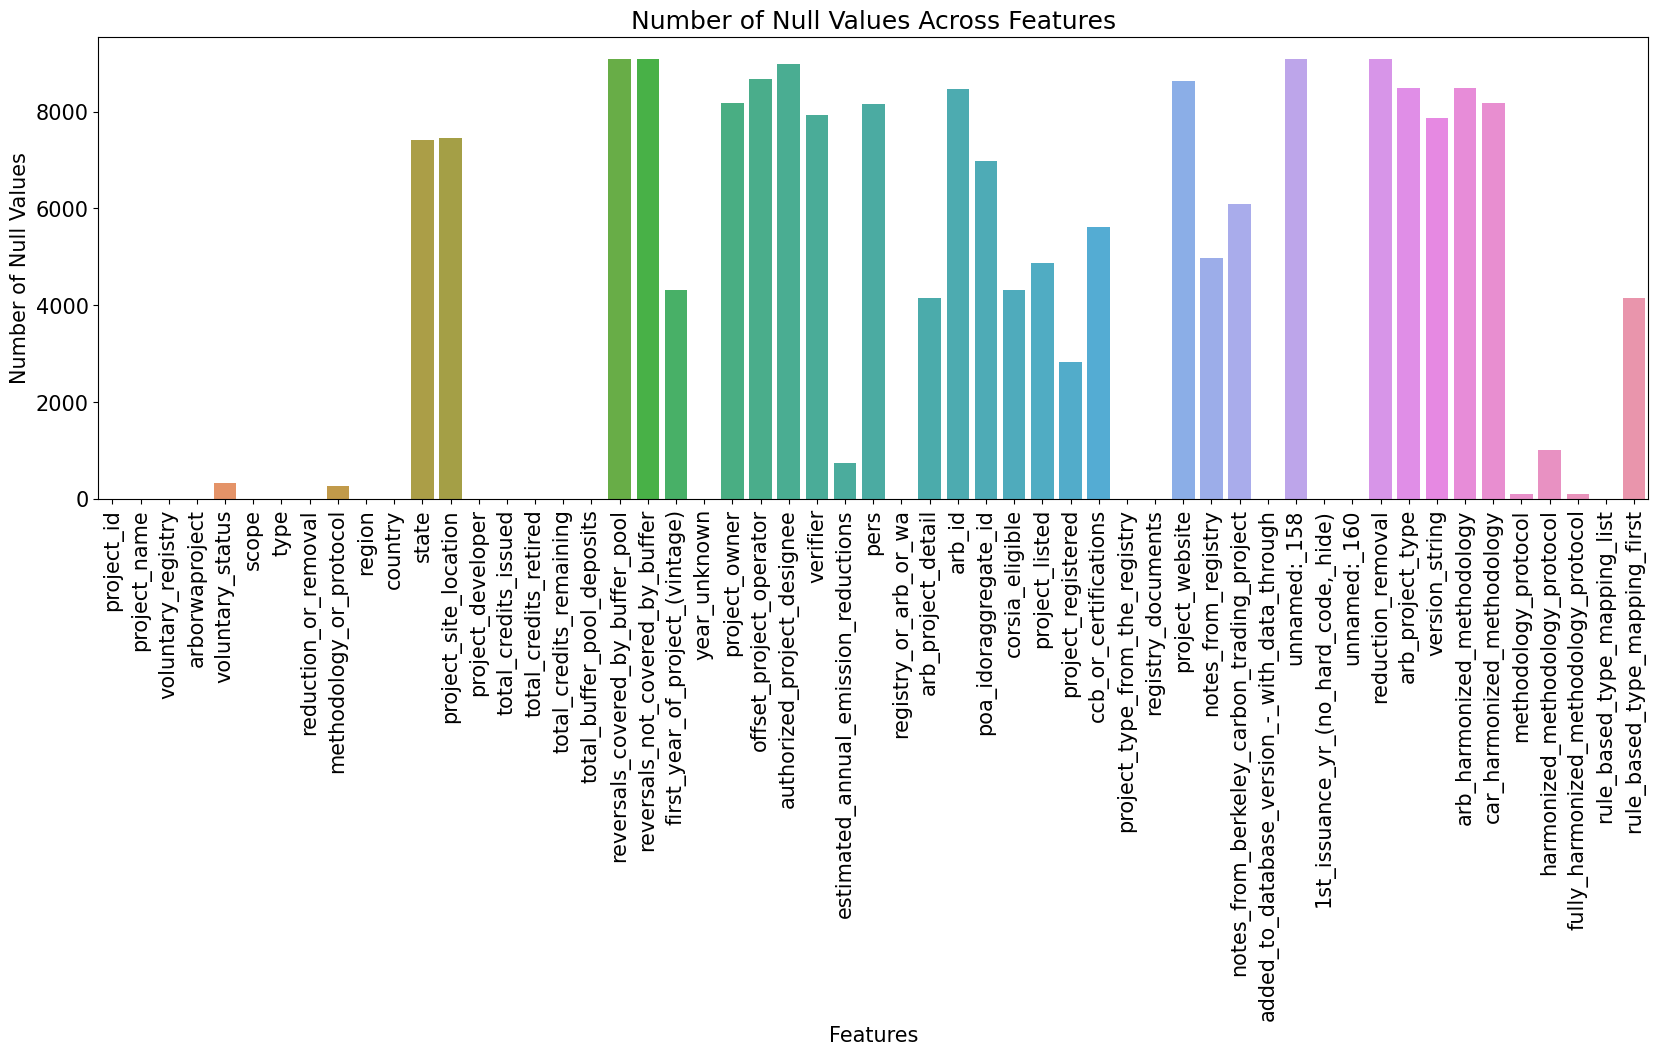

In [187]:
# Calculate the number of null values for each column
null_counts = merged_df.isnull().sum()

# Plot the number of null values using a bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values Across Features')
plt.xticks(rotation=90)
plt.show()

In [188]:
# Generate the value counts for the 'Scope' column
scope_counts = merged_df['scope'].value_counts()
scope_counts

scope
Household & Community       2567
Renewable Energy            2358
Forestry & Land Use         1652
Agriculture                  961
Waste Management             622
Chemical Processes           462
Industrial & Commercial      349
Transportation               106
Carbon Capture & Storage      12
Name: count, dtype: int64

In [189]:
# Generate the value counts for the 'Scope' column
type_counts = merged_df['type'].value_counts()
type_counts

type
Cookstoves                                           1436
Wind                                                 1013
Improved Forest Management                            760
Hydropower                                            528
Afforestation/Reforestation                           477
Manure Methane Digester                               448
Clean Water                                           412
Landfill Methane                                      382
Solar - Centralized                                   317
Rice Emission Reductions                              294
Ozone Depleting Substances Recovery & Destruction     292
Biomass                                               278
REDD+                                                 272
Community Boreholes                                   259
Biodigesters                                          242
Sustainable Agriculture                               166
Bundled Energy Efficiency                             155
Mine Meth

In [97]:
# Group by 'Project Scope' and 'Project Type', then count the occurrences
grp_type_by_scope = merged_df.groupby(['scope', 'type']).size().reset_index(name='Count')

# Display the grouped DataFrame
grp_type_by_scope

,scope,type,Count
0,Agriculture,Bundled Compost Production and Soil Application,2
1,Agriculture,Carbon Mineralization,1
2,Agriculture,Compost Addition to Rangeland,1
3,Agriculture,Feed Additives,12
4,Agriculture,Improved Irrigation Management,16
5,Agriculture,Manure Methane Digester,448
6,Agriculture,Nitrogen Management,6
7,Agriculture,Rice Emission Reductions,294
8,Agriculture,Solid Waste Separation,15
9,Agriculture,Sustainable Agriculture,166


In [224]:
project_by_regions = merged_df.groupby(['region']).size().reset_index(name='Count')
project_by_regions

,region,Count
0,Central Asia,12
1,Eastern Asia,1470
2,Eastern Europe,25
3,Europe,122
4,International,13
5,Latin America and the Caribbean,1036
6,North America,1560
7,Northern Africa,34
8,Oceania,39
9,South-Eastern Asia,431


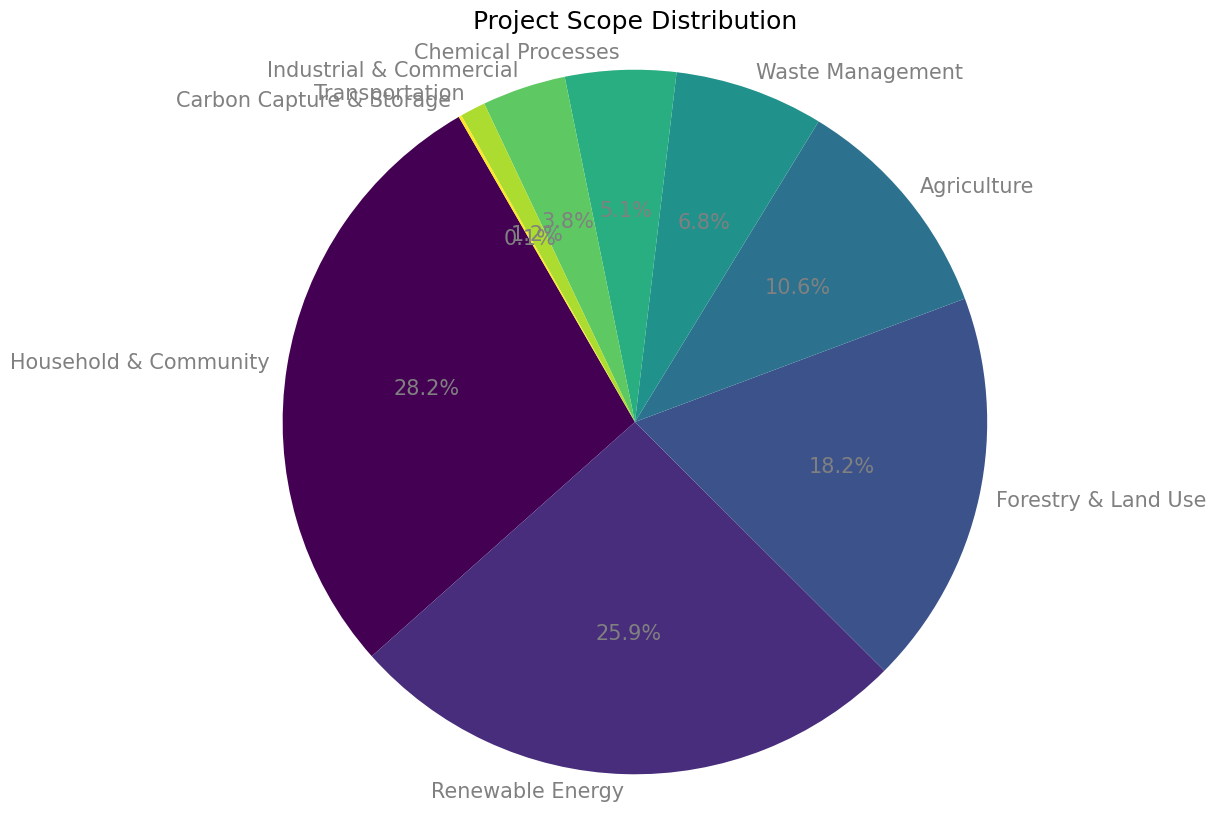

In [147]:

# Convert the Series to a DataFrame
df_scope_counts = scope_counts.reset_index()
df_scope_counts.columns = ['scope', 'count']

df_scope_counts.set_index('scope', inplace=True)

# Plotting the pie chart
plt.figure(figsize=(10, 10))

pie = df_scope_counts['count'].plot.pie(
    autopct='%1.1f%%', 
    startangle=120, 
    cmap='viridis',  
    title='Project Scope Distribution', 
    labeldistance=1.05,
    textprops={'color': "grey", 'fontsize': 15}
)

plt.ylabel('')  # Remove y-axis label
# Increase label font size
plt.rcParams['font.size'] = 15.0
# Ensuring the pie is a circle
plt.axis('equal')

# Display the chart
plt.show()

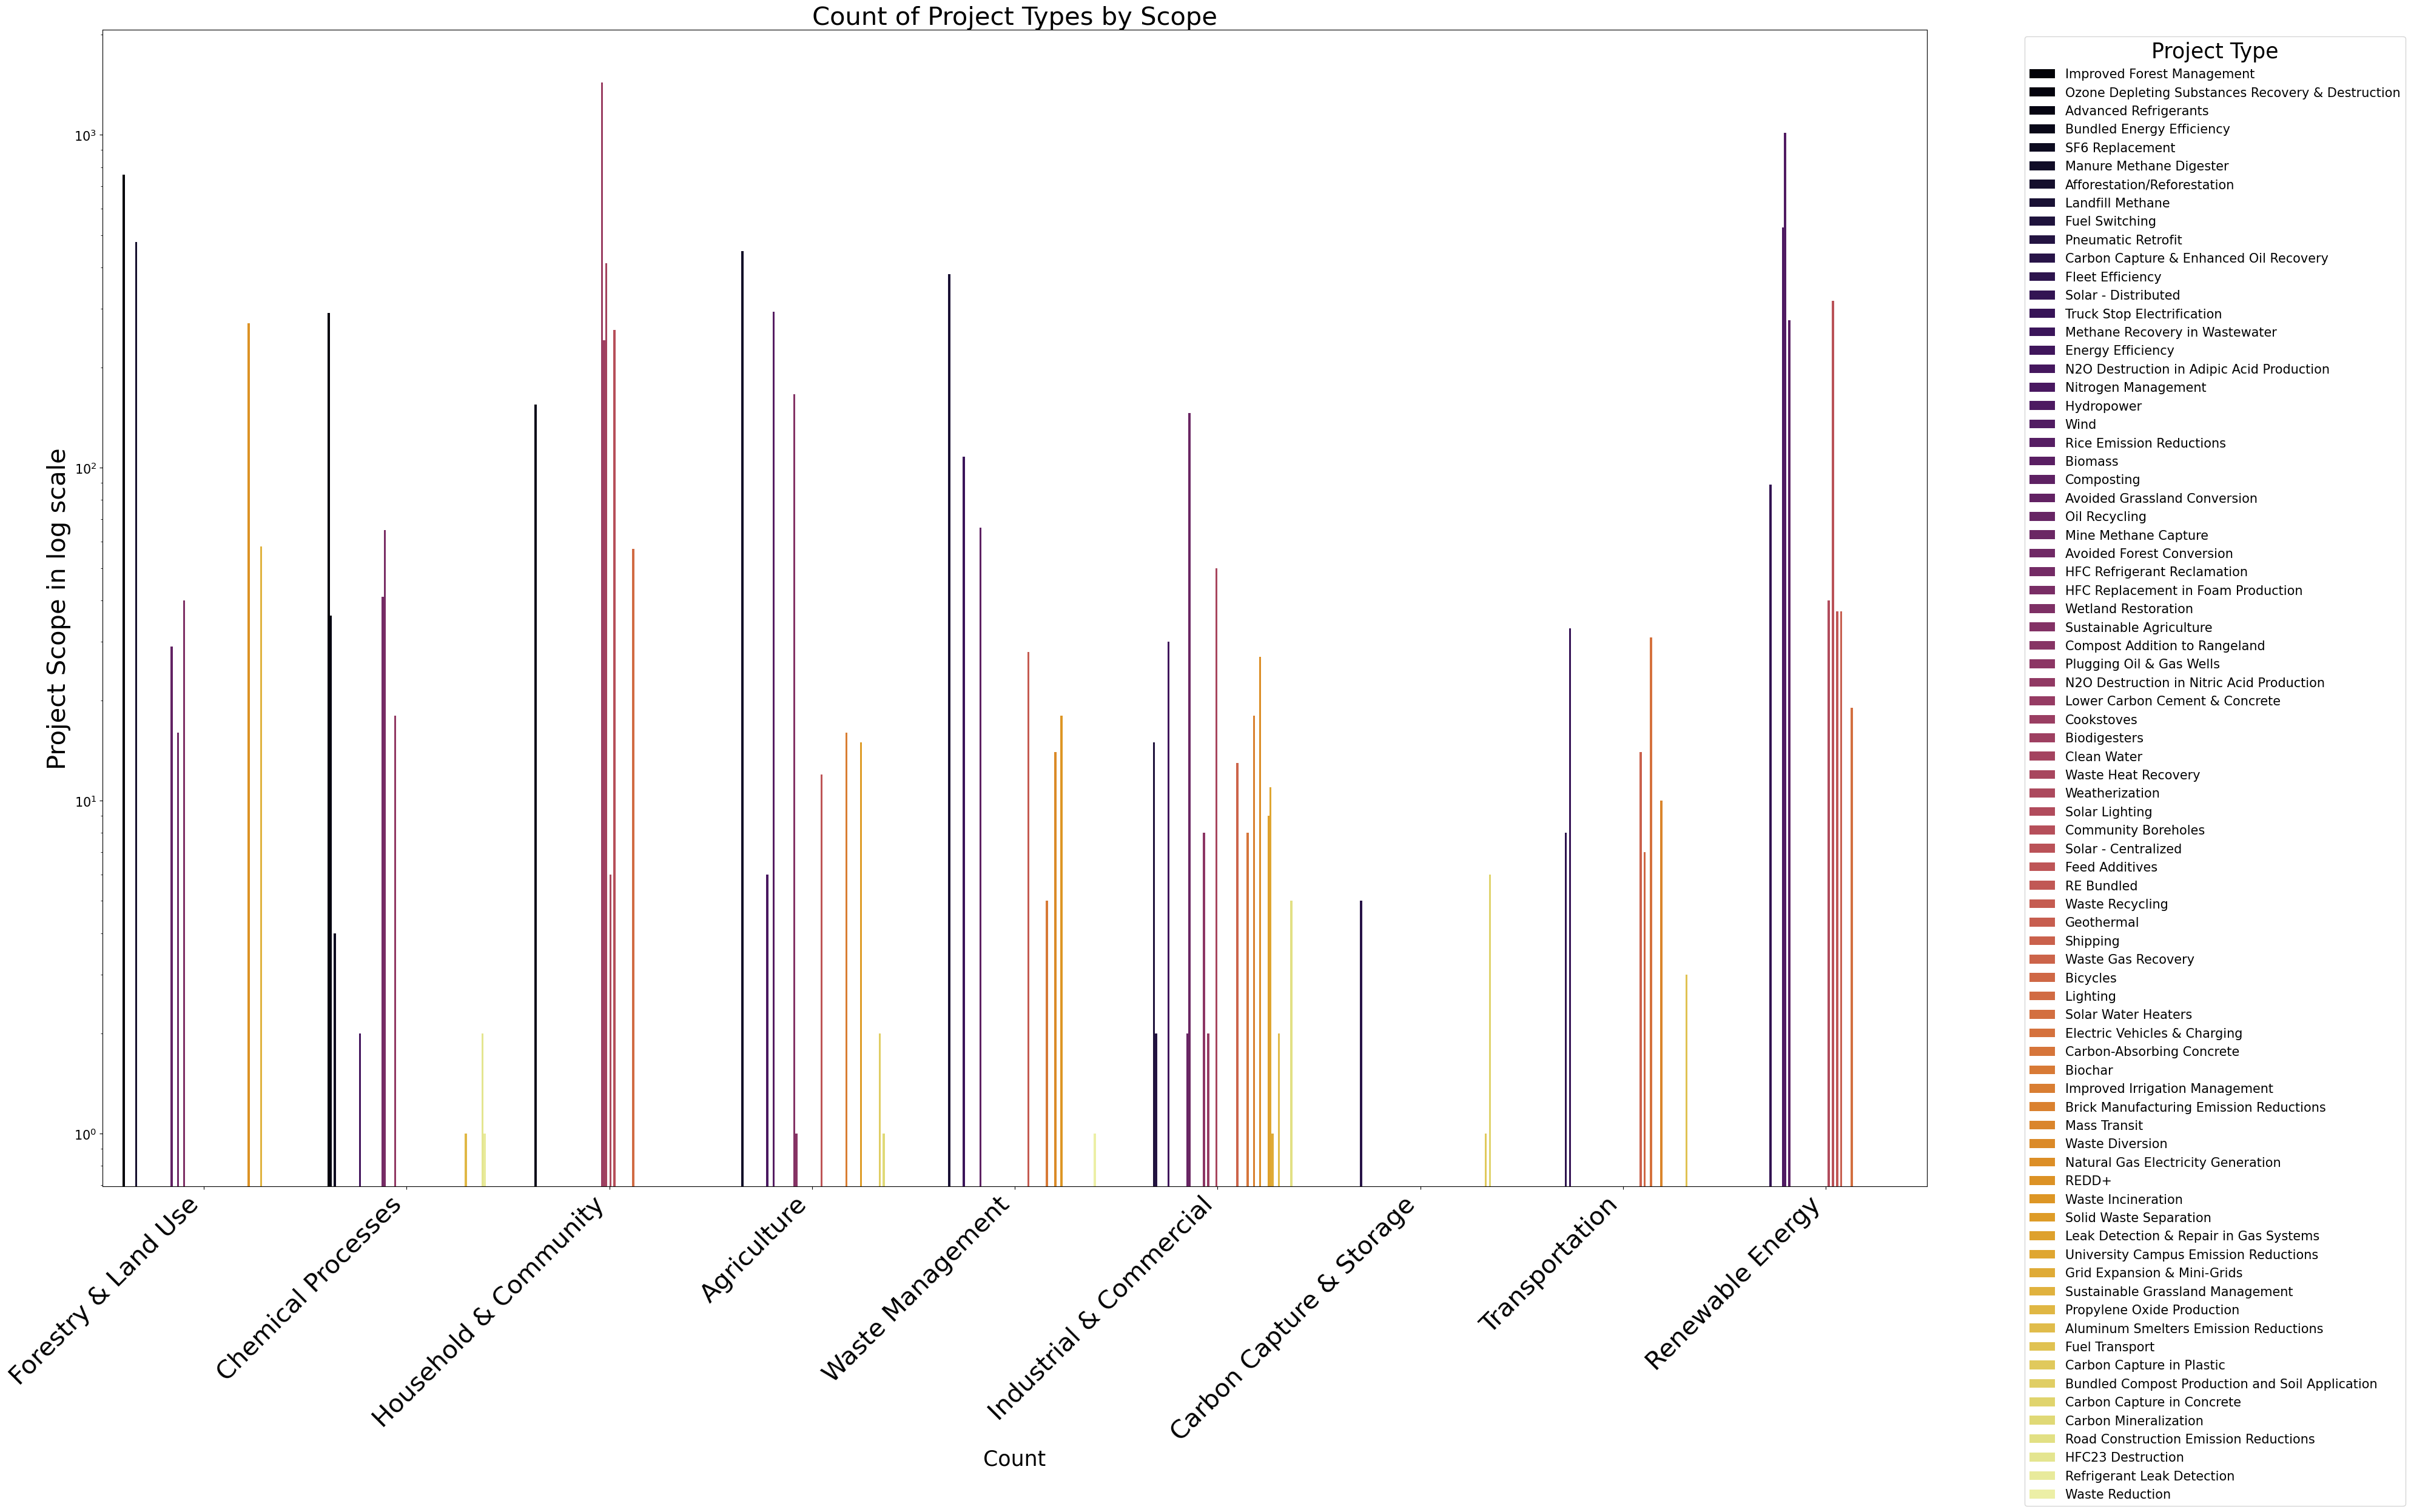

In [99]:
# Create a bar plot
plt.figure(figsize=(40, 25))
sns.countplot(data= merged_df, x='scope', hue='type', palette='inferno',linewidth=5)
plt.title('Count of Project Types by Scope', fontsize=30)
plt.ylabel('Project Scope in log scale', fontsize=30)
plt.yscale('log')
plt.xlabel('Count',fontsize=25)
plt.xticks(fontsize=30, rotation = 45, ha= "right")
plt.legend(title='Project Type', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='25')
plt.tight_layout()
plt.show()

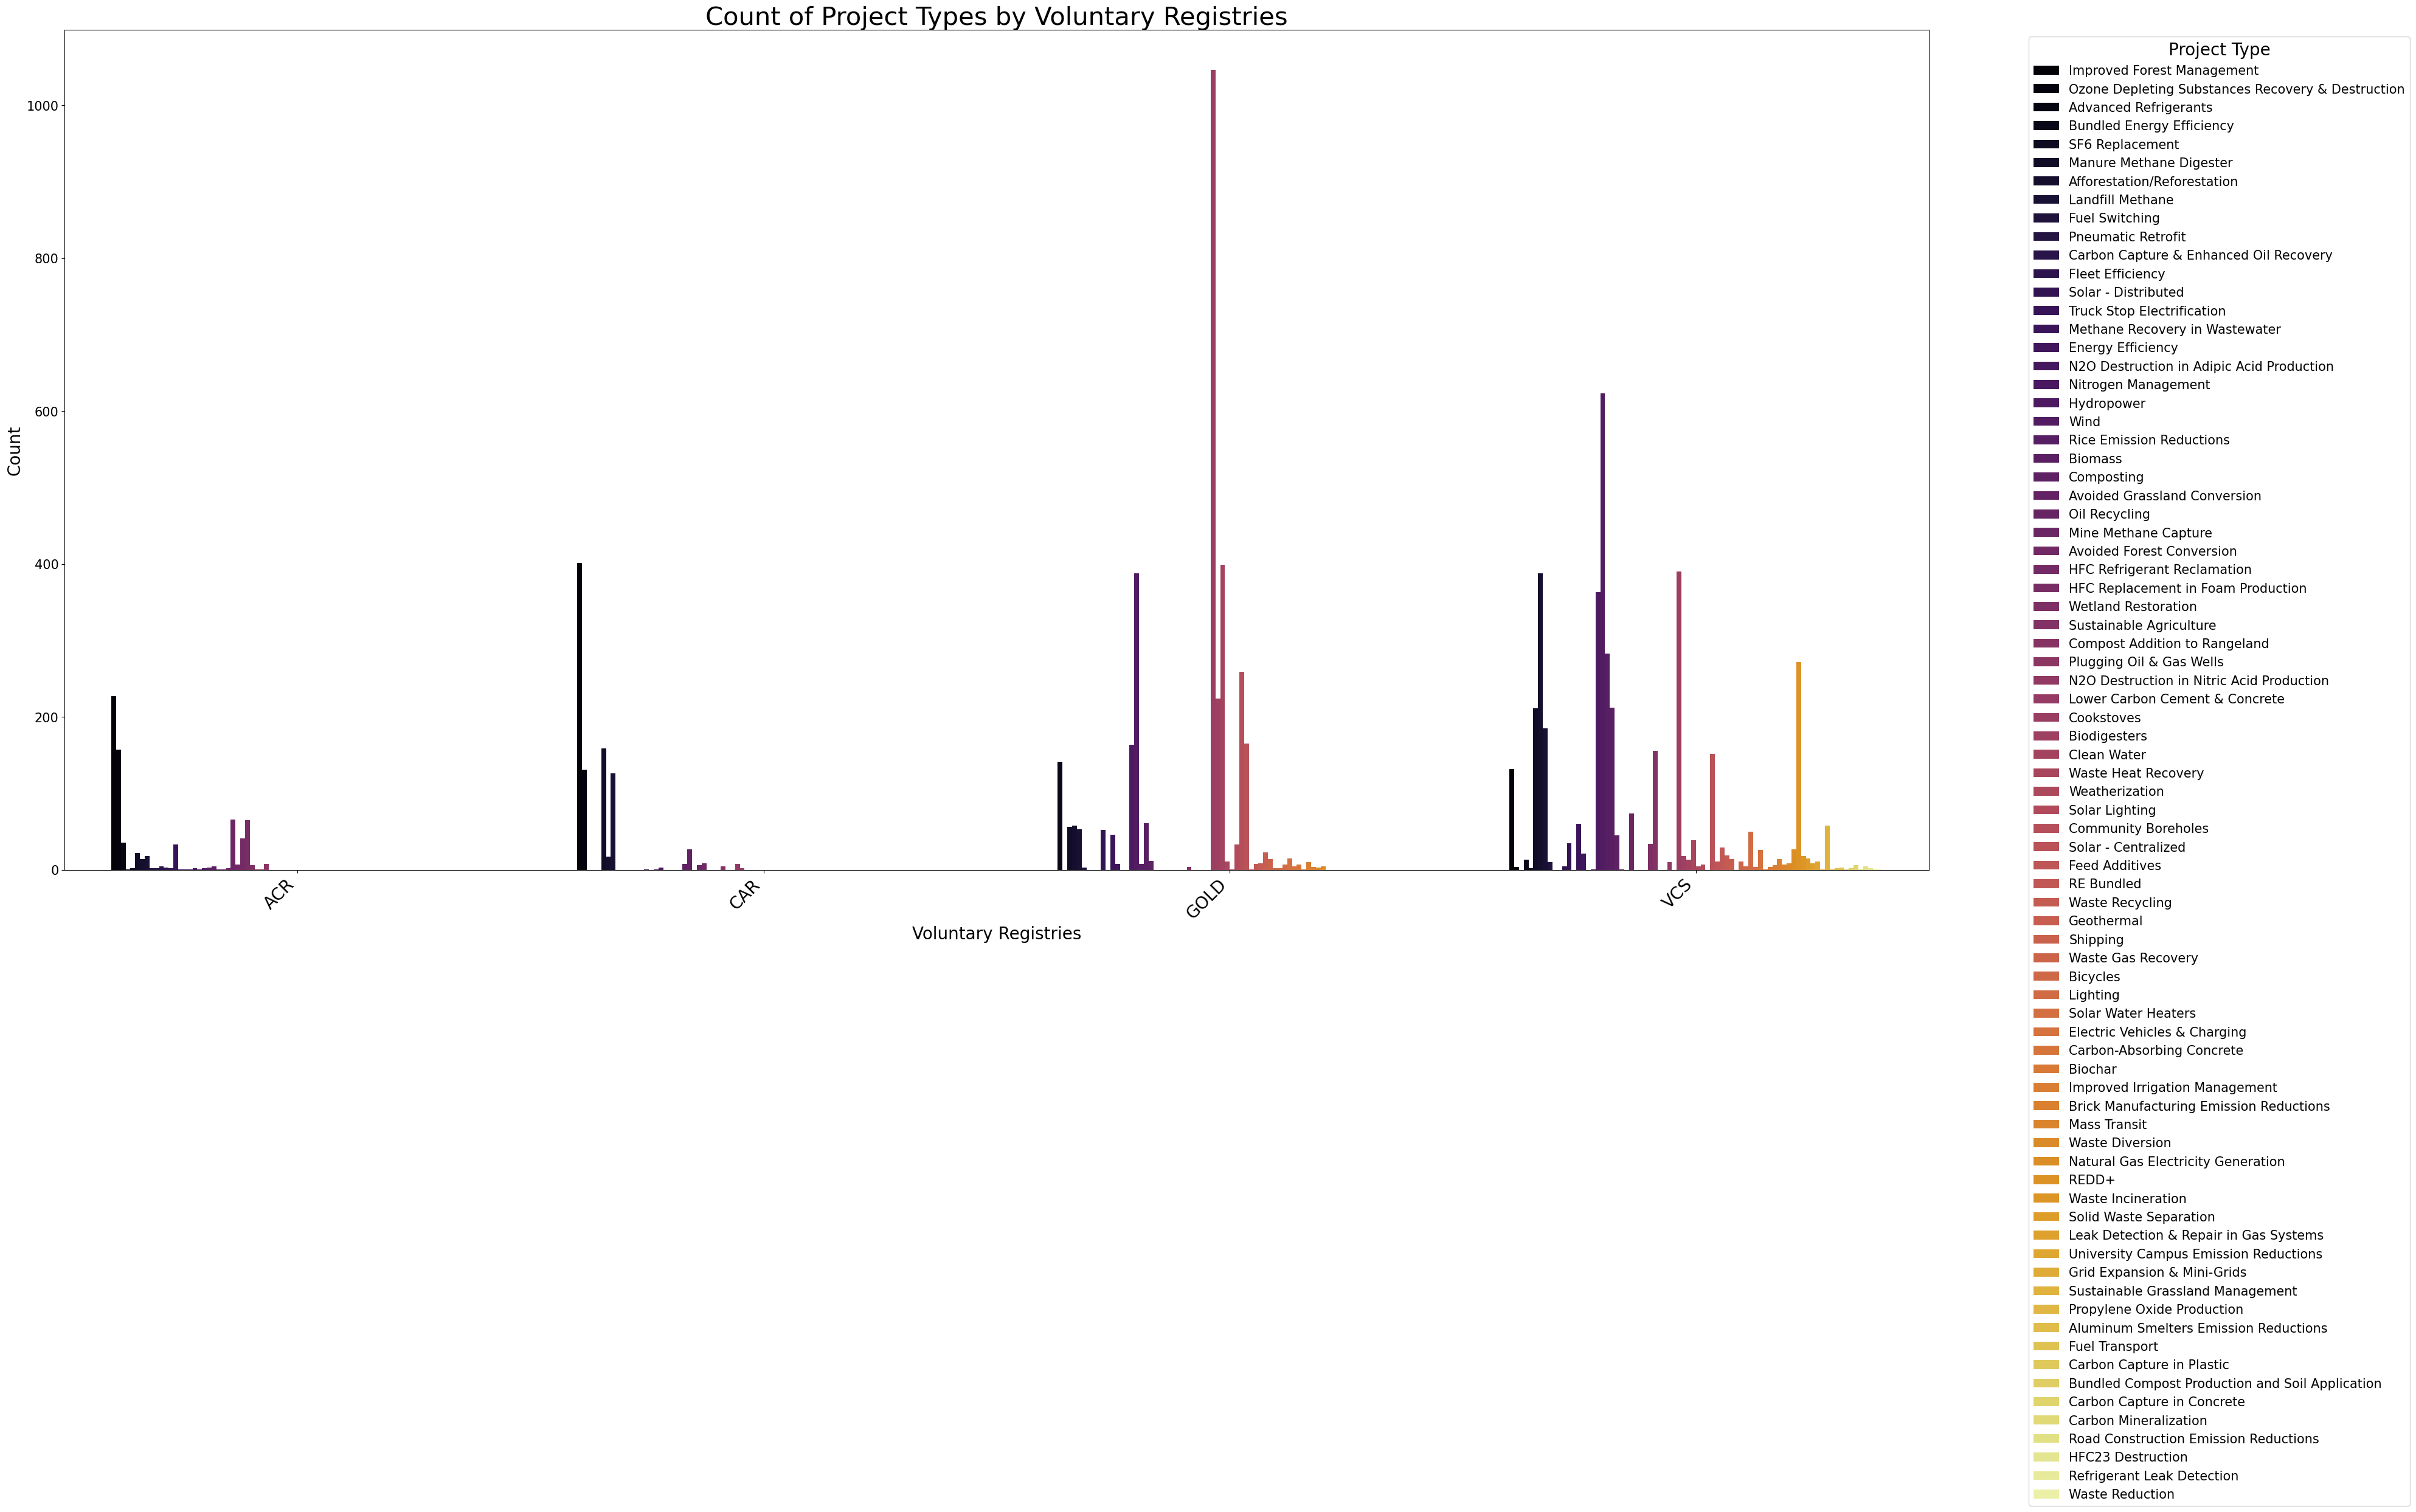

In [100]:
# Create a bar plot
plt.figure(figsize=(40, 22))
sns.countplot(data=merged_df, x='voluntary_registry', hue='type', palette='inferno')
plt.title('Count of Project Types by Voluntary Registries',fontsize=30)
plt.xlabel('Voluntary Registries',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=20)
plt.legend(title='Project Type', bbox_to_anchor=(1.05, 1), loc='upper left',title_fontsize='20')
plt.tight_layout()
plt.show()

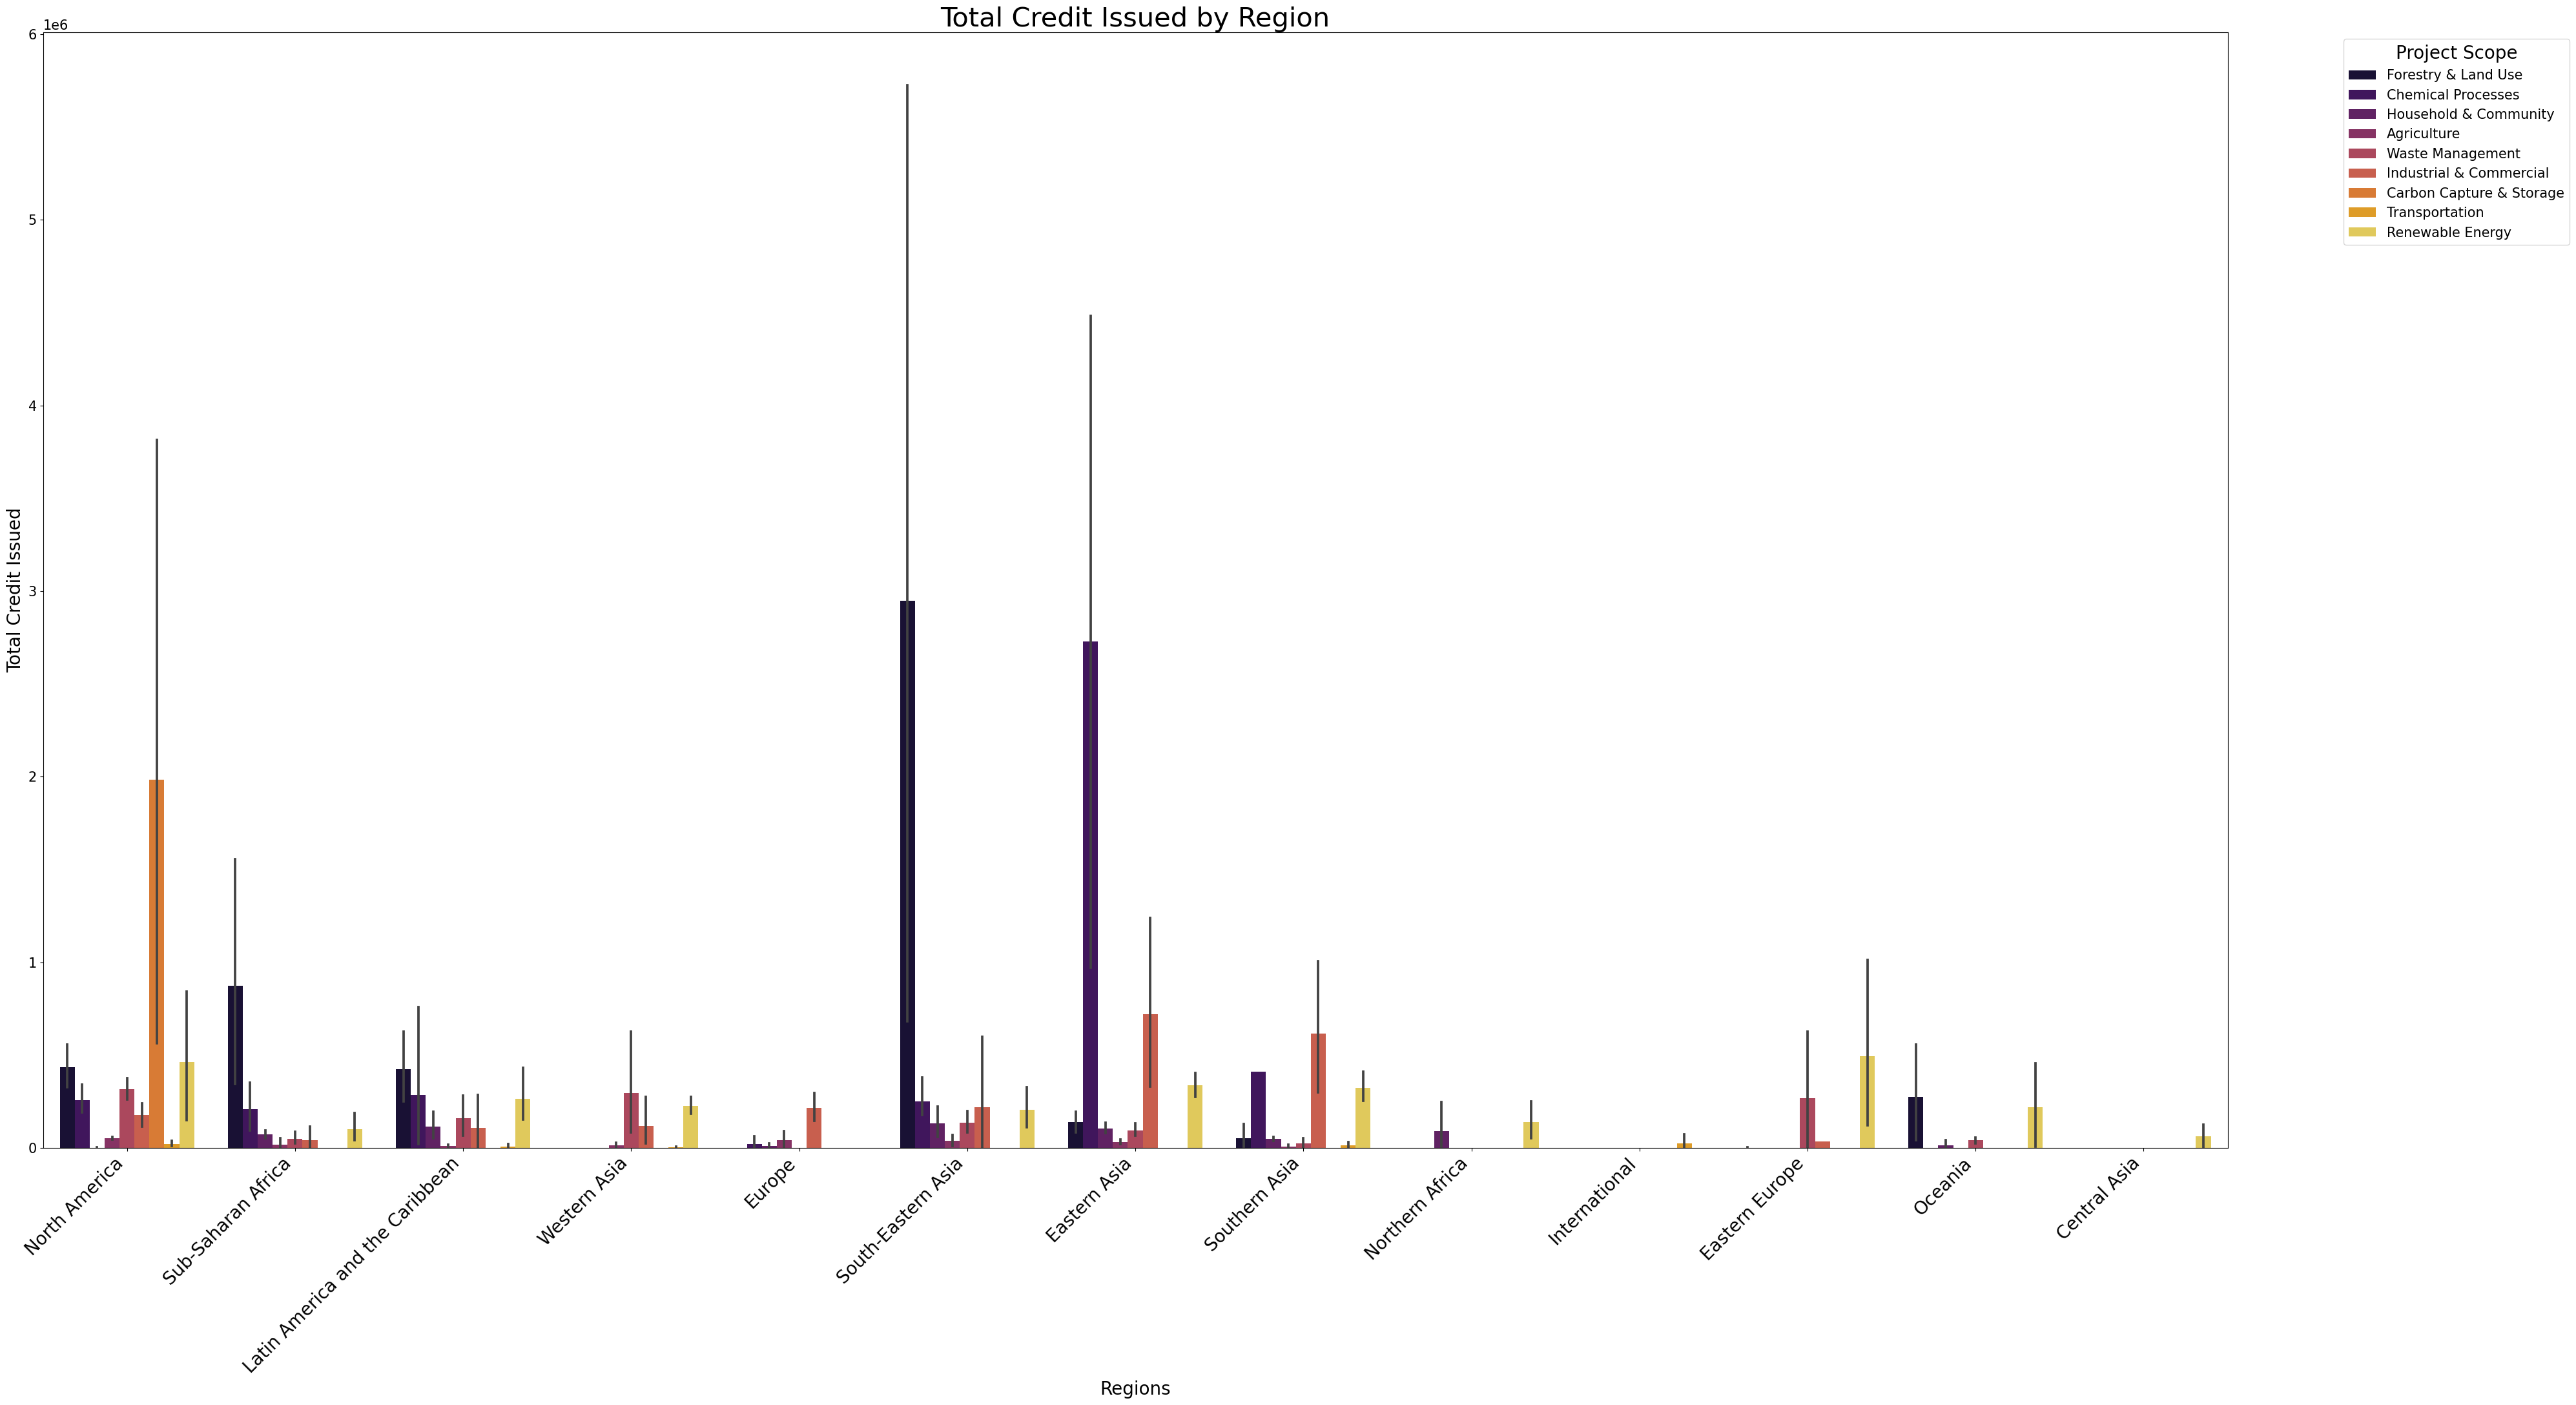

In [223]:
plt.figure(figsize=(40, 22))
sns.barplot(data=merged_df, x='region', y ='total_credits_issued', hue='scope', palette='inferno')
plt.title('Total Credit Issued by Region',fontsize=30)
plt.xlabel('Regions',fontsize=20)
plt.ylabel('Total Credit Issued',fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=20)
plt.legend(title='Project Scope', bbox_to_anchor=(1.05, 1), loc='upper left',title_fontsize='20')
plt.tight_layout()
plt.show()

/Users/shrikantwaghmare/miniconda3/envs/w266/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrikantwaghmare/miniconda3/envs/w266/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrikantwaghmare/miniconda3/envs/w266/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x1500 with 0 Axes>

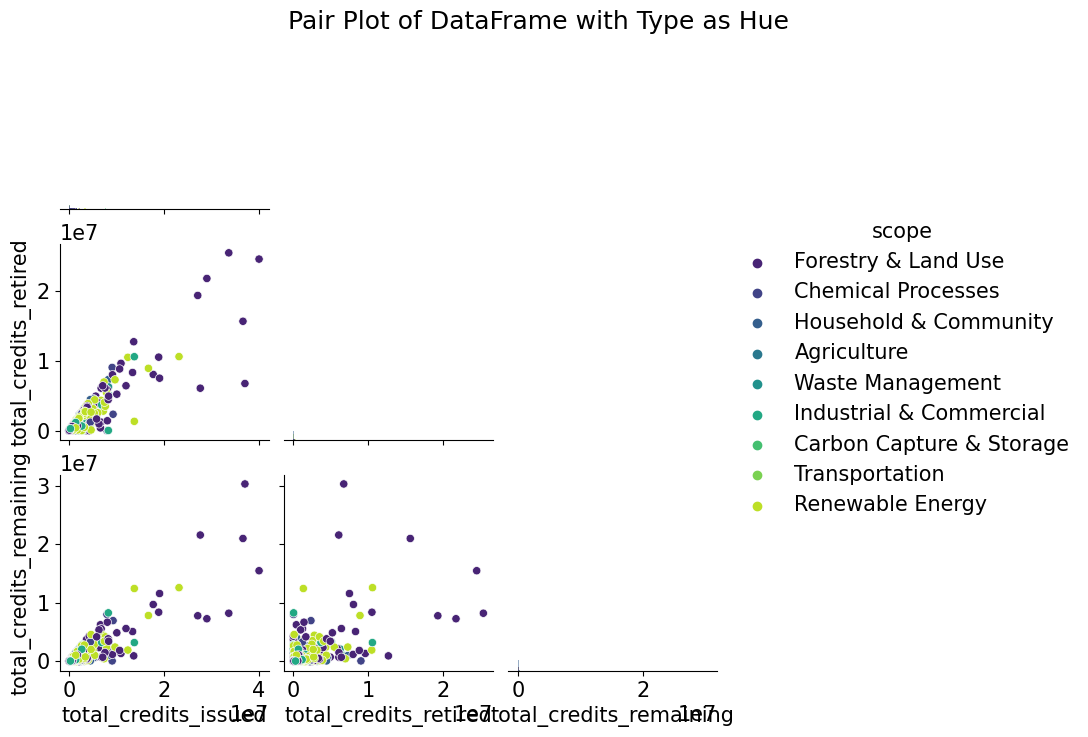

In [34]:
# Selecting columns for pair plot (numerical and categorical)
cols_to_plot = ['scope', 'type','total_credits_issued', 'total_credits_retired', 'total_credits_remaining']

# Create pair plot
plt.figure(figsize=(20, 15))
sns.pairplot(merged_df[cols_to_plot], hue='scope', diag_kind='hist', palette='viridis', corner=True)
plt.suptitle('Pair Plot of DataFrame with Type as Hue')
plt.show()

In [204]:
# Calculate value counts for 'type' column
type_counts = merged_df['type'].value_counts()

types_to_group = type_counts[type_counts < 6].index

# Filter the DataFrame
other_type = merged_df[merged_df['type'].isin(types_to_group)]
print("Total Types :",len(types_to_group))
print("Shape of other_type dataframe:", other_type.shape)

Total Types : 19
Shape of other_type dataframe: (43, 55)


In [205]:
other_type.to_csv('../data/fewerthan6projects.csv', index=False)

In [206]:
# Remove the project types with less than 7 records from the dataset
merged_df_cleaned = merged_df[~merged_df['type'].isin(types_to_group)]


In [219]:
duplicate_rows = merged_df_cleaned[merged_df_cleaned.duplicated()]
# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [project_id, project_name, voluntary_registry, arborwaproject, voluntary_status, scope, type, reduction_or_removal, methodology_or_protocol, region, country, state, project_site_location, project_developer, total_credits_issued, total_credits_retired, total_credits_remaining, total_buffer_pool_deposits, reversals_covered_by_buffer_pool, reversals_not_covered_by_buffer, first_year_of_project_(vintage), year_unknown, project_owner, offset_project_operator, authorized_project_designee, verifier, estimated_annual_emission_reductions, pers, registry_or_arb_or_wa, arb_project_detail, arb_id, poa_idoraggregate_id, corsia_eligible, project_listed, project_registered, ccb_or_certifications, project_type_from_the_registry, registry_documents, project_website, notes_from_registry, notes_from_berkeley_carbon_trading_project, added_to_database_version_-_with_data_through, unnamed:_158, 1st_issuance_yr_(no_hard_code,_hide), unnamed:_160, reduction_removal, ar

In [207]:
# Keeping only the features of interest
features_of_interest = ["project_id","project_name", "methodology_or_protocol",
                        "fully_harmonized_methodology_protocol","version_string", 
                        "region", "voluntary_registry", "project_type_from_the_registry",
                        "project_developer", "arborwaproject", "scope","type",
                        "rule_based_type_mapping_first"]


In [208]:
project_df_wfoi = merged_df_cleaned[features_of_interest]
project_df_wfoi.head()

,project_name,methodology_or_protocol,fully_harmonized_methodology_protocol,version_string,region,voluntary_registry,project_type_from_the_registry,project_developer,arborwaproject,scope,type,rule_based_type_mapping_first
0,Doyon Ts'oo,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,NaN,North America,ACR,Forest Carbon,"Doyon, Limited",No,Forestry & Land Use,Improved Forest Management,Improved Forest Management
1,Challenge Tree Farm IFM Project,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,NaN,North America,ACR,Forest Carbon,1169,No,Forestry & Land Use,Improved Forest Management,Improved Forest Management
2,A-Gas 3-2023B,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,North America,ACR,Ozone Depleting Substances,A-Gas US Inc.,No,Chemical Processes,Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction
3,Advanced Refrigeration - ARS2022004,Advanced Refrigeration Systems,ACR Advanced Refrigeration Systems,NaN,North America,ACR,Industrial Process Emissions,Therm Solutions Inc.,No,Chemical Processes,Advanced Refrigerants,Advanced Refrigerants
4,AFOVERT Energy,AMS-I.E.: Switch from non-renewable biomass fo...,AMS-I.E. Switch from non-renewable biomass for...,NaN,Sub-Saharan Africa,ACR,Fuel Switching,Katene Kadji,No,Household & Community,Bundled Energy Efficiency,NaN


In [209]:
project_df_wfoi.shape

(9046, 12)

In [210]:
null_counts = project_df_wfoi.isnull().sum()
null_counts

project_name                                1
methodology_or_protocol                   267
fully_harmonized_methodology_protocol     103
version_string                           7824
region                                      0
voluntary_registry                          0
project_type_from_the_registry              0
project_developer                           0
arborwaproject                              0
scope                                       0
type                                        0
rule_based_type_mapping_first            4141
dtype: int64

In [211]:
# Columns to fill with ''
object_columns = project_df_wfoi.select_dtypes(include='object').columns
fill_value_object = {col: ' ' for col in object_columns}

# Fill NaNs
project_df_wfoi = project_df_wfoi.fillna(fill_value_object)
final_count = project_df_wfoi.isnull().sum()
final_count

project_name                             0
methodology_or_protocol                  0
fully_harmonized_methodology_protocol    0
version_string                           0
region                                   0
voluntary_registry                       0
project_type_from_the_registry           0
project_developer                        0
arborwaproject                           0
scope                                    0
type                                     0
rule_based_type_mapping_first            0
dtype: int64

In [ ]:
# Translate the project_name to english

In [ ]:
pip install langdetect

In [ ]:
pip install translate

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
from translate import Translator
from langdetect import detect
import time

# Initialize the translator
translator = Translator(to_lang="en")

# Function to detect language and translate project names
def translate_name(name):
    try:
        # Detect the language of the project name
        lang = detect(name)
        # If the detected language is not English, translate it
        if lang != 'en':
            translated = translator.translate(name, dest='en')
            return translated.text
        else:
            # If the language is English, return the original name
            return name
    except Exception as e:
        print(f"Error translating '{name}': {e}")
        return name

# Apply the translation function to the project_name column with retry logic
def translate_with_retry(name, retries=3):
    for i in range(retries):
        try:
            return translate_name(name)
        except Exception as e:
            print(f"Retry {i+1}/{retries} for '{name}' failed with error: {e}")
            time.sleep(1)  # wait for a second before retrying
    return name  # return the original name if all retries fail

# Apply the translation function to the project_name column
project_df_wfoi['project_name_english'] = project_df_wfoi['project_name'].apply(translate_name)

# Save the translated dataset
project_df_wfoi.to_csv('../data/translated_dataset.csv', index=False)

## Data Split

In [212]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df_w59types, test_df_w59types = train_test_split(project_df_wfoi, test_size=0.2, random_state=42, stratify=project_df_wfoi['type'])

In [213]:
#print shape of the split dataset
print(train_df_w59types.shape, test_df_w59types.shape)

(7236, 12) (1810, 12)


In [214]:
# Checkpoint 
# Save the DataFrames as CSV files
train_df_w59types.to_csv('../data/train_dataset_w59types.csv', index=False)
test_df_w59types.to_csv('../data/test_dataset_w59types.csv', index=False)

In [215]:
type_counts_train = train_df_w59types["type"].value_counts()
print(type_counts_train)
print("Total number of types",len(type_counts_train))

type
Cookstoves                                           1149
Wind                                                  810
Improved Forest Management                            608
Hydropower                                            422
Afforestation/Reforestation                           381
Manure Methane Digester                               358
Clean Water                                           330
Landfill Methane                                      306
Solar - Centralized                                   254
Rice Emission Reductions                              235
Ozone Depleting Substances Recovery & Destruction     234
Biomass                                               222
REDD+                                                 218
Community Boreholes                                   207
Biodigesters                                          194
Sustainable Agriculture                               133
Bundled Energy Efficiency                             124
Mine Meth

In [217]:
type_counts_test = test_df_w59types["type"].value_counts()
print(type_counts_test)
print("Total number of types", len(type_counts_test))

type
Cookstoves                                           287
Wind                                                 203
Improved Forest Management                           152
Hydropower                                           106
Afforestation/Reforestation                           96
Manure Methane Digester                               90
Clean Water                                           82
Landfill Methane                                      76
Solar - Centralized                                   63
Rice Emission Reductions                              59
Ozone Depleting Substances Recovery & Destruction     58
Biomass                                               56
REDD+                                                 54
Community Boreholes                                   52
Biodigesters                                          48
Sustainable Agriculture                               33
Bundled Energy Efficiency                             31
Mine Methane Capture      